## Calculation of COV of log of Spliced and Unspliced genes of DMSO and IDOX sample

After running the velocyto tool independently (for velocity analysis) got the .loom file for each samples (DMSO and IDOX)

Here we will read the files and calculate the correlation of spliced and unspliced of between two samples

In [4]:
adata_dmso = sc.read_loom("/shared/space2/molina/husainm/DNA_pertu/velocyto_dmso/possorted_genome_bam_QGJCJ.loom", sparse=True)


/shared/software/miniconda3-admin/envs/python-pytorch-tensorflow-3.9-1.11.0-2.6.2/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata_dmso

AnnData object with n_obs × n_vars = 878 × 32285
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [9]:
S_sum_per_cell = np.sum(adata_dmso.layers['spliced'], axis=1)
U_sum_per_cell = np.sum(adata_dmso.layers['unspliced'], axis=1)

In [10]:
adata_dmso.obs['S_sum'] = S_sum_per_cell
adata_dmso.obs['U_sum'] = U_sum_per_cell

In [14]:
mean_S_per_gene = np.mean(adata_dmso.layers['spliced'], axis=0)
mean_U_per_gene = np.mean(adata_dmso.layers['unspliced'], axis=0)

In [15]:
adata_dmso.var['mean_S'] = np.squeeze(np.asarray(mean_S_per_gene))
adata_dmso.var['mean_U'] = np.squeeze(np.asarray(mean_U_per_gene))


In [28]:
adata_dmso.var

,Accession,Chromosome,End,Start,Strand,mean_S,mean_U
Gene,,,,,,,
AC125149.3,ENSMUSG00000079800,GL456210.1,58882,9124,-,0.00000,0.000000
AC125149.5,ENSMUSG00000095092,GL456210.1,110303,108390,-,0.00000,0.000000
AC125149.2,ENSMUSG00000079794,GL456210.1,136519,135395,-,0.00000,0.000000
AC125149.1,ENSMUSG00000079192,GL456210.1,124928,123792,+,0.00000,0.000000
AC125149.4,ENSMUSG00000094799,GL456210.1,149707,147792,+,0.00000,0.000000
...,...,...,...,...,...,...,...
Gm28672,ENSMUSG00000100492,Y,89225296,89222067,+,0.00000,0.000000
Gm28670,ENSMUSG00000099982,Y,89394761,89391528,+,0.00000,0.000000
Gm29504,ENSMUSG00000100533,Y,90277501,90275224,+,0.00000,0.000000


In [19]:
adata_idox = sc.read_loom("/shared/space2/molina/husainm/DNA_pertu/velocyto_idox/possorted_genome_bam_EK3BM.loom", sparse=True)


/shared/software/miniconda3-admin/envs/python-pytorch-tensorflow-3.9-1.11.0-2.6.2/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [33]:
adata_idox


AnnData object with n_obs × n_vars = 793 × 32285
    obs: 'S_sum', 'U_sum'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [32]:
adata_dmso

AnnData object with n_obs × n_vars = 878 × 32285
    obs: 'S_sum', 'U_sum'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mean_S', 'mean_U'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

## Calculation of the sum of all the counts S and U in each gene per cell and devide the S and U matrices to get the mean

In [21]:
S_sum_per_cell_i = np.sum(adata_idox.layers['spliced'], axis=1)
U_sum_per_cell_i = np.sum(adata_idox.layers['unspliced'], axis=1)

In [22]:
adata_idox.obs['S_sum'] = S_sum_per_cell_i
adata_idox.obs['U_sum'] = U_sum_per_cell_i

In [23]:
mean_S_per_gene_i = np.mean(adata_idox.layers['spliced'], axis=0)
mean_U_per_gene_i = np.mean(adata_idox.layers['unspliced'], axis=0)

In [34]:
adata_idox.var['mean_S'] = np.squeeze(np.asarray(mean_S_per_gene_i))
adata_idox.var['mean_U'] = np.squeeze(np.asarray(mean_U_per_gene_i))


In [35]:
adata_idox.var

,Accession,Chromosome,End,Start,Strand,mean_S,mean_U
Gene,,,,,,,
AC125149.3,ENSMUSG00000079800,GL456210.1,58882,9124,-,0.000000,0.000000
AC125149.5,ENSMUSG00000095092,GL456210.1,110303,108390,-,0.000000,0.000000
AC125149.2,ENSMUSG00000079794,GL456210.1,136519,135395,-,0.000000,0.000000
AC125149.1,ENSMUSG00000079192,GL456210.1,124928,123792,+,0.000000,0.000000
AC125149.4,ENSMUSG00000094799,GL456210.1,149707,147792,+,0.000000,0.000000
...,...,...,...,...,...,...,...
Gm28672,ENSMUSG00000100492,Y,89225296,89222067,+,0.000000,0.000000
Gm28670,ENSMUSG00000099982,Y,89394761,89391528,+,0.000000,0.000000
Gm29504,ENSMUSG00000100533,Y,90277501,90275224,+,0.000000,0.000000


## Calcualation of the mean S and mean U for each gene

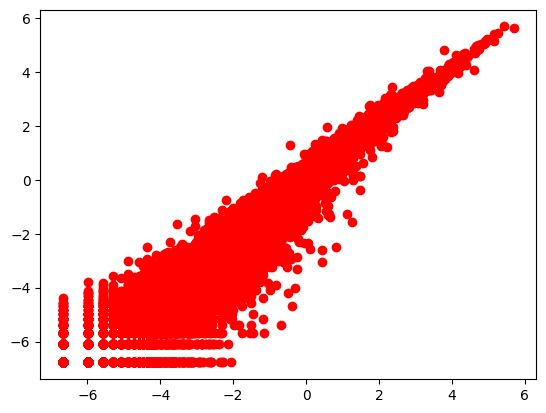

In [45]:
plt.scatter(np.log(adata_idox.var['mean_S']), np.log(adata_dmso.var['mean_S']), color='red')
                

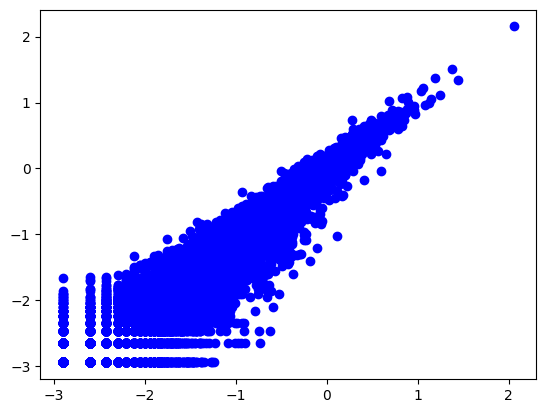

In [47]:
plt.scatter(np.log10(adata_idox.var['mean_U']),np.log10(adata_dmso.var['mean_U']),color='blue')

In [77]:
da=adata_idox.var['mean_U']/adata_dmso.var['mean_U']

In [104]:
a1=adata_dmso.var['mean_S']/adata_idox.var['mean_S']
a2=adata_idox.var['mean_U']/adata_dmso.var['mean_U']
dg=a1*a2

In [123]:
geneids = np.isfinite(da)&np.isfinite(dg)&~(da==0)&~(dg==0)
np.sum(geneids)
np.sum(da[geneids]==0)

0

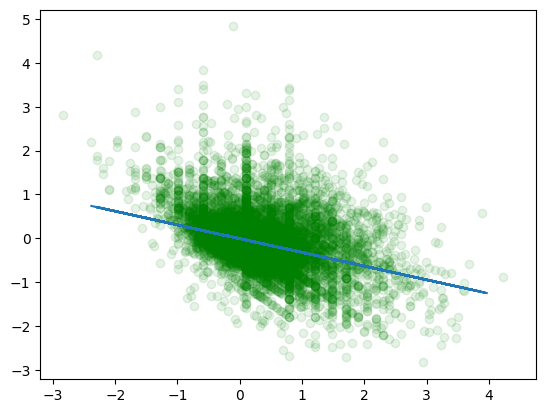

In [141]:
plt.scatter(np.log(da),-np.log(dg),color='green',alpha=0.1)
m,b = np.polyfit(np.log(da[geneids]), -np.log(dg[geneids]), 1)
plt.plot(np.log(da),m*np.log(da)+b)
np.linalg.eig(np.cov(np.log(da[geneids]),-np.log(dg[geneids])))


array([ 0.81816666, -0.57498114])

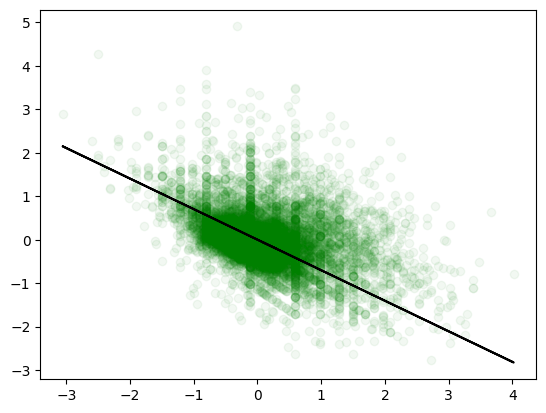

In [164]:
la = np.log(da[geneids])-np.mean(np.log(da[geneids]))
lg = np.log(dg[geneids])-np.mean(np.log(dg[geneids]))
l,M = np.linalg.eig(np.cov(la,-lg))
plt.scatter(la,-lg,color='green',alpha=0.05)
plt.plot(la,M[1,0]/M[0,0]*la,color='black')

M[:,0]

In [169]:
M

array([[ 0.81816666,  0.57498114],
       [-0.57498114,  0.81816666]])

In [136]:
correlation_coefficient = np.corrcoef(np.log(da[geneids]), np.log(dg[geneids]))
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: [[1.         0.35545852]
 [0.35545852 1.        ]]


In [137]:
import scipy as sp

In [138]:
sp.stats.pearsonr(np.log(da[geneids]), np.log(dg[geneids]))

PearsonRResult(statistic=0.35545852174536585, pvalue=0.0)

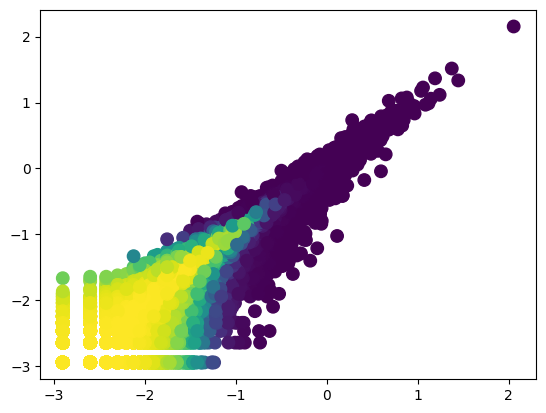

In [64]:
# Calculate the point density
xy = np.vstack([adata_idox.var['mean_U'],adata_dmso.var['mean_U']])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(np.log10(adata_idox.var['mean_U']), np.log10(adata_dmso.var['mean_U']), c=z, s=80)
plt.show()

In [56]:
np.log(adata_dmso.var['mean_S'])

/shared/software/miniconda3-admin/envs/python-pytorch-tensorflow-3.9-1.11.0-2.6.2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Gene
AC125149.3       -inf
AC125149.5       -inf
AC125149.2       -inf
AC125149.1       -inf
AC125149.4       -inf
               ...   
Gm28672          -inf
Gm28670          -inf
Gm29504          -inf
Gm20837          -inf
Gm47283       1.53743
Name: mean_S, Length: 32285, dtype: float64

In [ ]:
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

In [87]:
adata.var[adata.var['mean_S'] > 100]

,Accession,Chromosome,End,Start,Strand,mean_S,mean_U
Gene,,,,,,,
Npm1,ENSMUSG00000057113,11,33163206,33152287,-,183.464692,1.259681
Eif5a,ENSMUSG00000078812,11,69921958,69916714,-,130.228929,0.017084
Rack1,ENSMUSG00000020372,11,48806434,48800332,+,139.654897,0.348519
Hsp90aa1,ENSMUSG00000021270,12,110702728,110690605,-,141.505695,1.567198
Rpl3,ENSMUSG00000060036,15,80091868,80077791,-,230.292711,3.559226
Rpl8,ENSMUSG00000003970,15,76906314,76904078,+,178.074032,0.554670
Hsp90ab1,ENSMUSG00000023944,17,45573271,45567775,-,149.591116,5.455581
Rps2,ENSMUSG00000044533,17,24721929,24718116,+,152.494305,0.961276
Eef1g,ENSMUSG00000071644,19,8978479,8967041,+,154.088838,1.260820


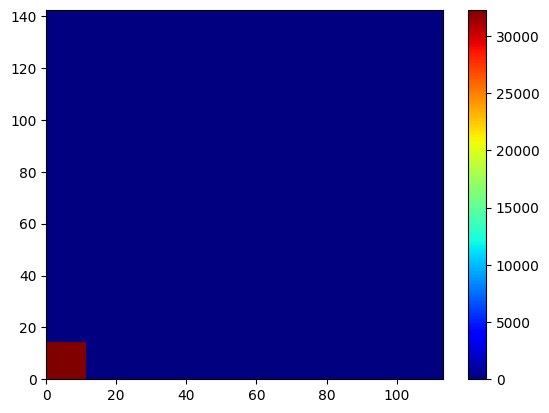

In [76]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist2d(adata_idox.var['mean_U'],adata_dmso.var['mean_U'],  cmap=plt.cm.jet)
plt.colorbar()
plt.show()


In [ ]:
adata_idox.var['mean_U'],adata_dmso.var['mean_U']